In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import cv2
import numpy as np
import math
from scipy.stats.stats import pearsonr
from skimage.metrics import peak_signal_noise_ratio

import csv

In [2]:
def append_list_as_row(csv_file, f_num, psnr_num):
    with open(csv_file, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerows([f_num])
        writer.writerows([psnr_num])


In [3]:
def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [4]:
def normalize(y_true, y_pred):
    # cast the target images to integer
    y_true = y_true * 255.0
    y_true = y_true.astype(np.uint8)
    y_true = np.clip(y_true, 0, 255)
    
    # cast the predicted images to integer
    y_pred = y_pred * 255.0
    y_pred = y_pred.astype(np.uint8)
    y_pred = np.clip(y_pred, 0, 255)
    # return the psnr
    return y_true, y_pred

In [5]:
PSNR = []
Pearson_CC = []
frames = []
for f in range(1,513):
    print('f :', f)
    frames.append(f)
    os.chdir('/aijjeh_odroid_sensors/aidd/data/interim/exp/L3_S4_B/compressed/389286p_512x512/')
    ref_data = cv2.imread('frame_%d_389286p_512x512.png' %f, 0)        
    ref_img = np.asarray(ref_data) # / 255.0
    
    
    os.chdir('/home/aijjeh/Desktop/Phd_Projects/compressive_sensing_project/Saeed_model/Saeed_CS_Exp/')
    pred_data = cv2.imread('Saeed_SR_Pred_frame_%d_UNIFORM_MESH.png' %f, 0) 
    pred_img = np.asarray(pred_data) # / 255.0        
    
    # ref_img = ref_img[113:213, 256-50:256+50]
    # pred_img = pred_img[113:213, 256-50:256+50]
    
    ref_img = ref_img - np.mean(ref_img)
    pred_img = pred_img - np.mean(pred_img)
    
    temp_pearson = np.corrcoef(ref_img.flat, pred_img.flat)
    print('Pearson_CC :', temp_pearson[0][1])
    Pearson_CC.append(temp_pearson[0][1])
    
    # ref_img, pred_img = normalize(ref_img, pred_img)
    
    
    temp_psnr = peak_signal_noise_ratio(ref_img, pred_img, data_range=128)
    print('PSNR :', temp_psnr)
    PSNR.append(temp_psnr)
    
    # damage_area = np.zeros((512,512))
    # damage_area[113:213, 256-50:256+50]= 255
    # ref_img = ref_img+ damage_area
    # fig = plt.figure(figsize=(20, 20))  
    # damage_area = ref_img
    # ax = fig.add_subplot(111)
    # ax.imshow(ref_img)  
    # ax.add_patch(patches.Rectangle((256-50, 112), 100, 100, linewidth=1, edgecolor='r', facecolor='none')) 
    # ax.axis('off')
    # plt.show()
    
os.chdir('/home/aijjeh/Desktop/Phd_Projects/compressive_sensing_project/')    
file_pearson = 'Saeed_Pearson_CC_exp_512_frames.csv'
file_psnr = 'Saeed_PSNR_exp_512_frames.csv'
# append_list_as_row(file_pearson, frames, Pearson_CC)
# append_list_as_row(file_psnr, frames, PSNR)
# 

f : 1
Pearson_CC : 0.040484602305742794
PSNR : 22.15784786036885
f : 2
Pearson_CC : 0.05871562156027341
PSNR : 25.745939877201142
f : 3
Pearson_CC : 0.03209000973592789
PSNR : 26.821542548720373
f : 4
Pearson_CC : -0.016193440241418968
PSNR : 27.65587947879566
f : 5
Pearson_CC : 0.007364870956459956
PSNR : 31.162354390747637
f : 6
Pearson_CC : -0.05592898741452029
PSNR : 31.017414842767735
f : 7
Pearson_CC : 0.12503644445133708
PSNR : 32.455368192235525
f : 8
Pearson_CC : 0.14609657728660388
PSNR : 32.91488425595563
f : 9
Pearson_CC : 0.19470426883561467
PSNR : 31.848487427687168
f : 10
Pearson_CC : 0.3309601440595284
PSNR : 33.450602768917705
f : 11
Pearson_CC : 0.42292629950954697
PSNR : 30.043791677492454
f : 12
Pearson_CC : 0.18720029407188424
PSNR : 30.312560798633168
f : 13
Pearson_CC : 0.1637292122206538
PSNR : 32.386086240888275
f : 14
Pearson_CC : 0.3510536118484206
PSNR : 34.08262134947065
f : 15
Pearson_CC : 0.5193397312030371
PSNR : 32.425701754654625
f : 16
Pearson_CC : 0.

PSNR : 9.031603283020267
f : 133
Pearson_CC : -0.26161655939872513
PSNR : 8.934585881521324
f : 134
Pearson_CC : -0.25044374759400756
PSNR : 8.734927550974593
f : 135
Pearson_CC : -0.22096690881464093
PSNR : 8.540136741097225
f : 136
Pearson_CC : -0.16844399477371574
PSNR : 9.007231346366346
f : 137
Pearson_CC : -0.14605273001462452
PSNR : 9.255187421825916
f : 138
Pearson_CC : -0.09368808251019965
PSNR : 9.163333616348622
f : 139
Pearson_CC : -0.07054319406968812
PSNR : 8.742505546061066
f : 140
Pearson_CC : -0.06187394151255027
PSNR : 8.883213529180821
f : 141
Pearson_CC : 0.004984252282362741
PSNR : 9.467478338537399
f : 142
Pearson_CC : 0.04025578900071633
PSNR : 9.827074777663674
f : 143
Pearson_CC : 0.07141872313116249
PSNR : 9.882083751723753
f : 144
Pearson_CC : 0.12180610511016825
PSNR : 9.966922380132063
f : 145
Pearson_CC : 0.13630064357574811
PSNR : 9.455436221343493
f : 146
Pearson_CC : 0.17133800390461562
PSNR : 10.21800468150861
f : 147
Pearson_CC : 0.20508721690142326
P

Pearson_CC : 0.30025291467480186
PSNR : 11.860330389965947
f : 259
Pearson_CC : 0.2268796558713619
PSNR : 12.029537293589769
f : 260
Pearson_CC : 0.17146573497108605
PSNR : 12.73872415927704
f : 261
Pearson_CC : 0.22952325861874906
PSNR : 12.924510944078927
f : 262
Pearson_CC : 0.30851489902501394
PSNR : 12.318623671333873
f : 263
Pearson_CC : 0.3003707595559302
PSNR : 12.09976471755789
f : 264
Pearson_CC : 0.2253569368064634
PSNR : 11.194333548908496
f : 265
Pearson_CC : 0.15941516654058224
PSNR : 11.083687272112257
f : 266
Pearson_CC : 0.20437963042641416
PSNR : 12.121845720789127
f : 267
Pearson_CC : 0.2556594199823406
PSNR : 10.757241031490148
f : 268
Pearson_CC : 0.2745423749043946
PSNR : 10.613375019355393
f : 269
Pearson_CC : 0.2076082697258998
PSNR : 9.667329132406175
f : 270
Pearson_CC : 0.12064434827304078
PSNR : 8.540063692541182
f : 271
Pearson_CC : 0.10422435181995227
PSNR : 9.031818639251414
f : 272
Pearson_CC : 0.1783821272865181
PSNR : 9.318073884752803
f : 273
Pearson_

Pearson_CC : 0.36148278481830026
PSNR : 12.399623234357701
f : 383
Pearson_CC : 0.33588655165133974
PSNR : 11.876244335245254
f : 384
Pearson_CC : 0.36250542850121814
PSNR : 12.961777344263535
f : 385
Pearson_CC : 0.41259221248822064
PSNR : 12.916983002566141
f : 386
Pearson_CC : 0.42077415938947965
PSNR : 12.710084108463334
f : 387
Pearson_CC : 0.37521415900160104
PSNR : 11.570082909951205
f : 388
Pearson_CC : 0.3277508621845857
PSNR : 12.623899738620503
f : 389
Pearson_CC : 0.37111268139115783
PSNR : 14.756214116263644
f : 390
Pearson_CC : 0.41728842476111716
PSNR : 14.735285303510313
f : 391
Pearson_CC : 0.4354772444372394
PSNR : 13.070381023216362
f : 392
Pearson_CC : 0.41654973271116585
PSNR : 11.887582388471468
f : 393
Pearson_CC : 0.38421220647204585
PSNR : 11.800951567414666
f : 394
Pearson_CC : 0.3765382759606573
PSNR : 14.839028048230958
f : 395
Pearson_CC : 0.43202123080311094
PSNR : 15.654826129833392
f : 396
Pearson_CC : 0.46967385043749704
PSNR : 13.990324420398677
f : 39

Pearson_CC : 0.03677266977639484
PSNR : 11.388520976051428
f : 506
Pearson_CC : 0.04019705029787053
PSNR : 10.8657068958353
f : 507
Pearson_CC : 0.06475178488085528
PSNR : 11.236757828474431
f : 508
Pearson_CC : 0.08467700424613905
PSNR : 12.503263540730178
f : 509
Pearson_CC : 0.07010202589601647
PSNR : 11.957903445669817
f : 510
Pearson_CC : 0.05424351996673276
PSNR : 12.090453348937373
f : 511
Pearson_CC : 0.06234073092256662
PSNR : 11.17175601987369
f : 512
Pearson_CC : 0.0888832714688071
PSNR : 10.524244801237224


In [6]:
PSNR = np.asarray(PSNR)
Pearson_CC = np.asarray(Pearson_CC)
print(np.mean(Pearson_CC))
print(np.mean(PSNR))

0.2729578053132493
13.457905782740674


In [7]:
print((np.min(Pearson_CC)))

-0.5338159388969399


In [8]:
print(np.max(PSNR))

34.23331878571163


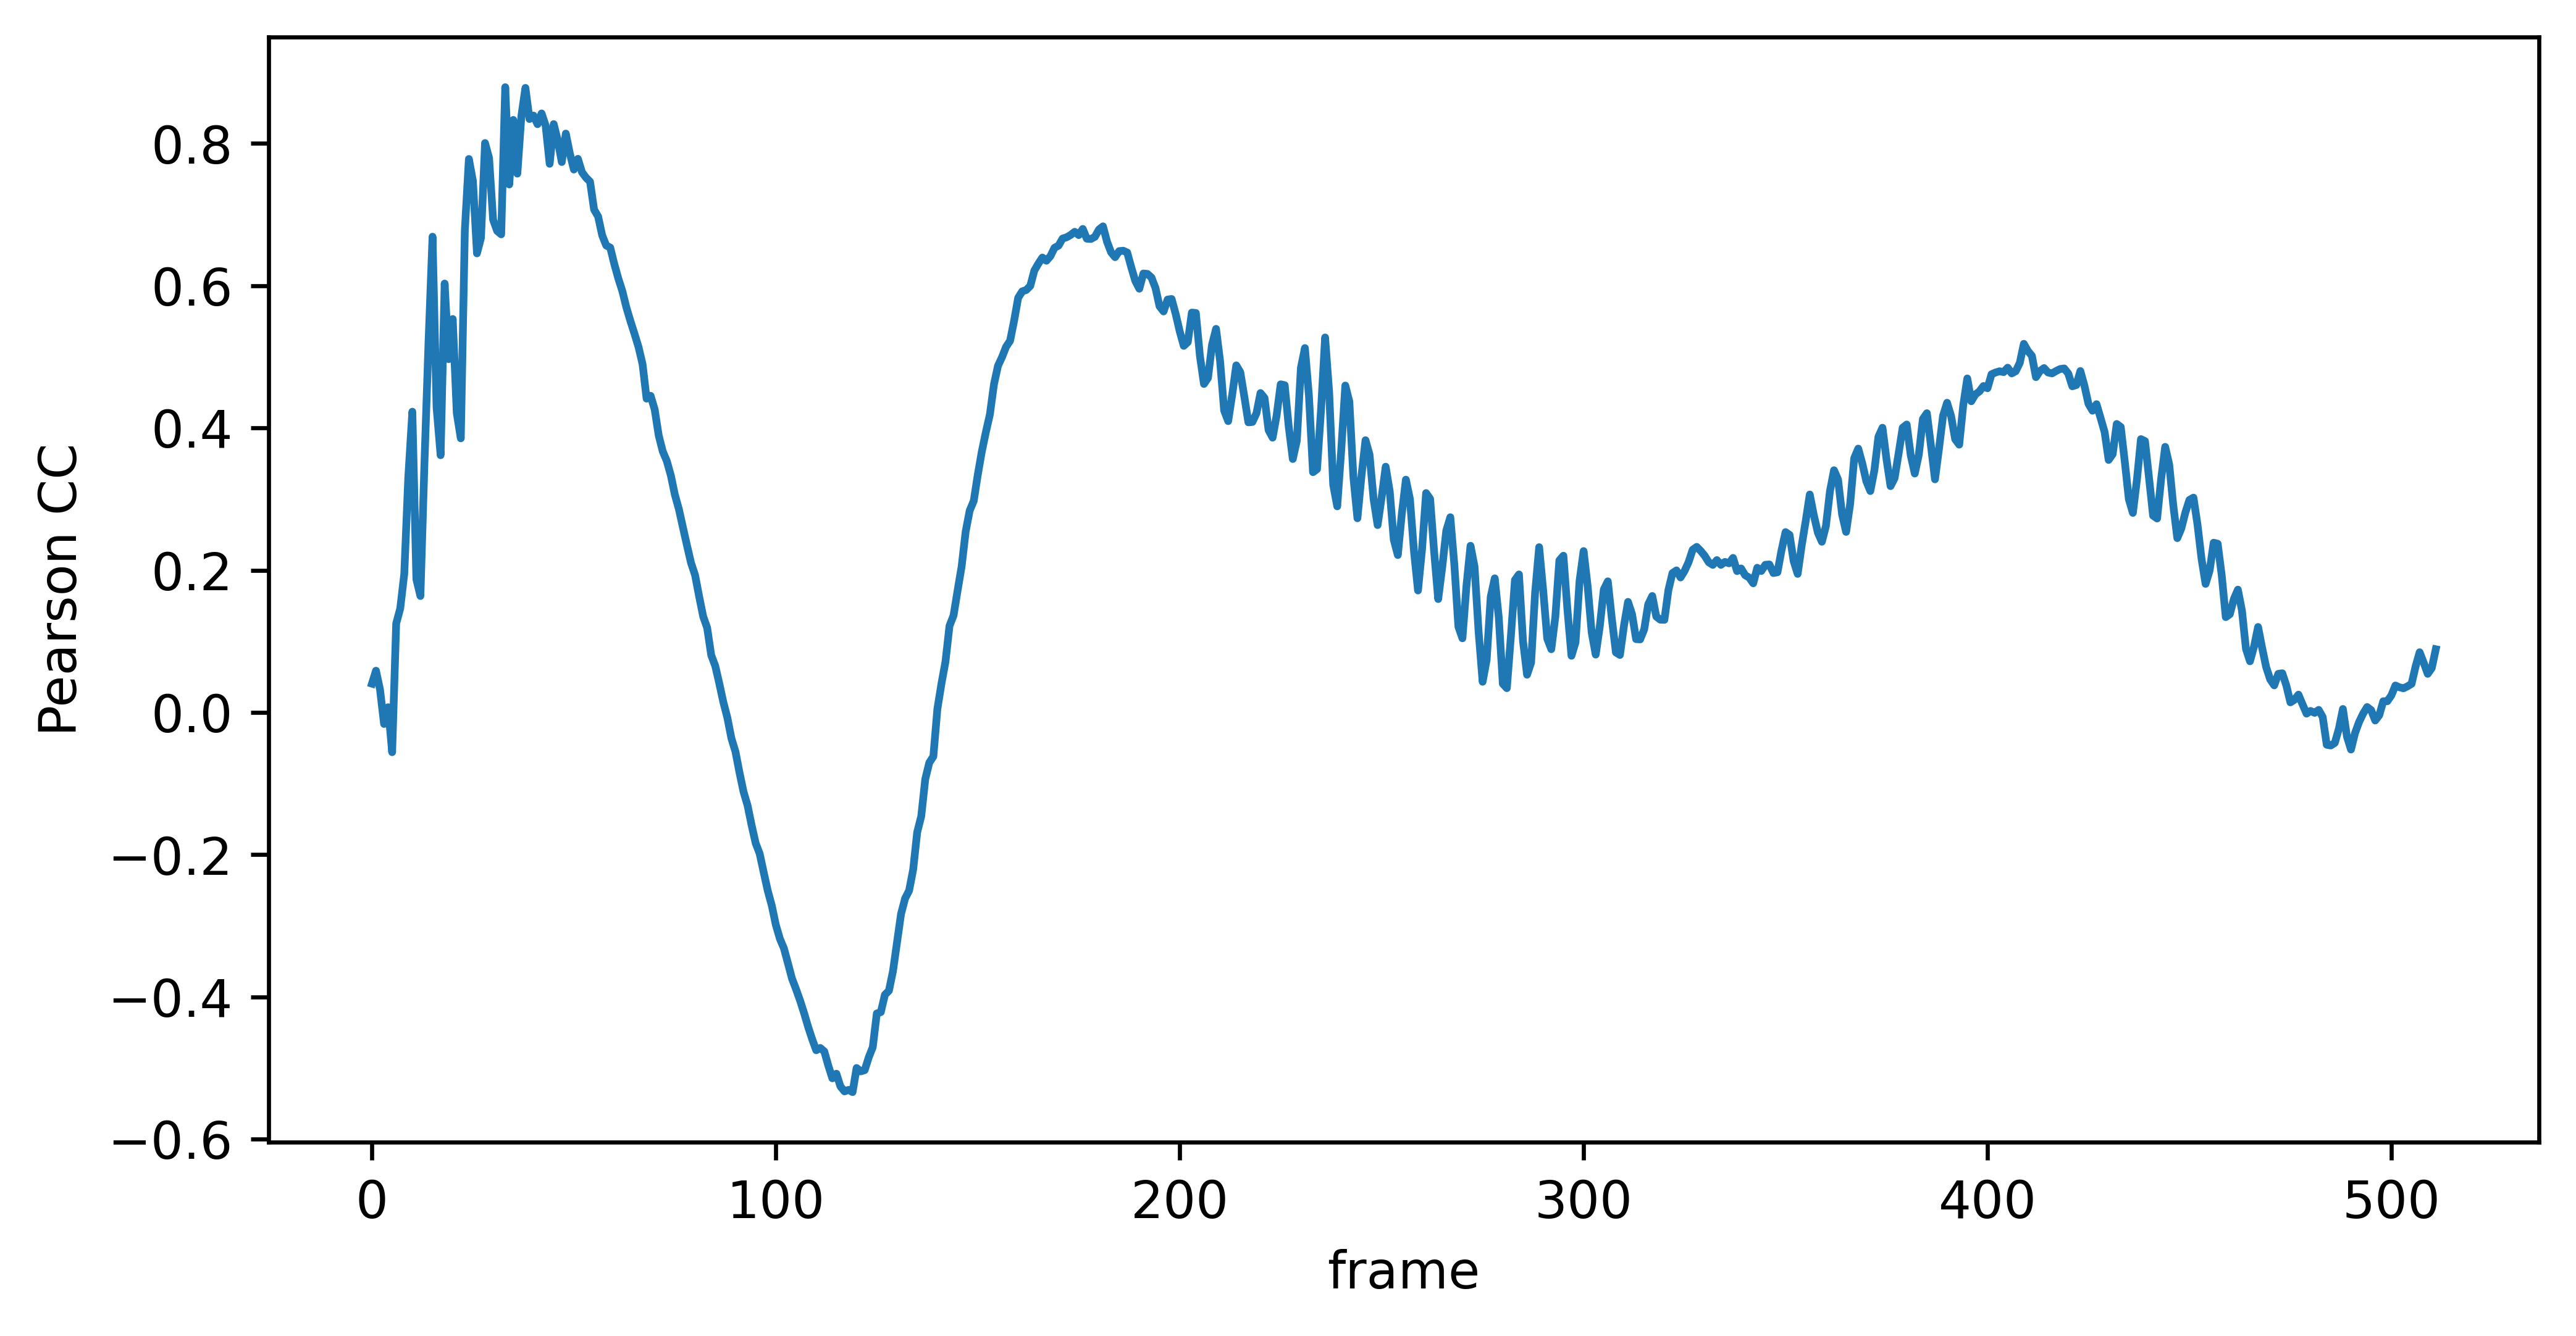

In [9]:
os.chdir('/home/aijjeh/Desktop/Phd_Projects/compressive_sensing_project/Experimental/Uniform_mesh_2nd_model/Compression_ration_0.215/')
plt.figure(figsize=(20/2.53,10/2.53), dpi=600)
plt.plot(Pearson_CC)
plt.xlabel('frame')
plt.ylabel('Pearson CC')
# plt.savefig("Pearson_CC_for_512_frames_exp_delamination_region.png")
plt.show()

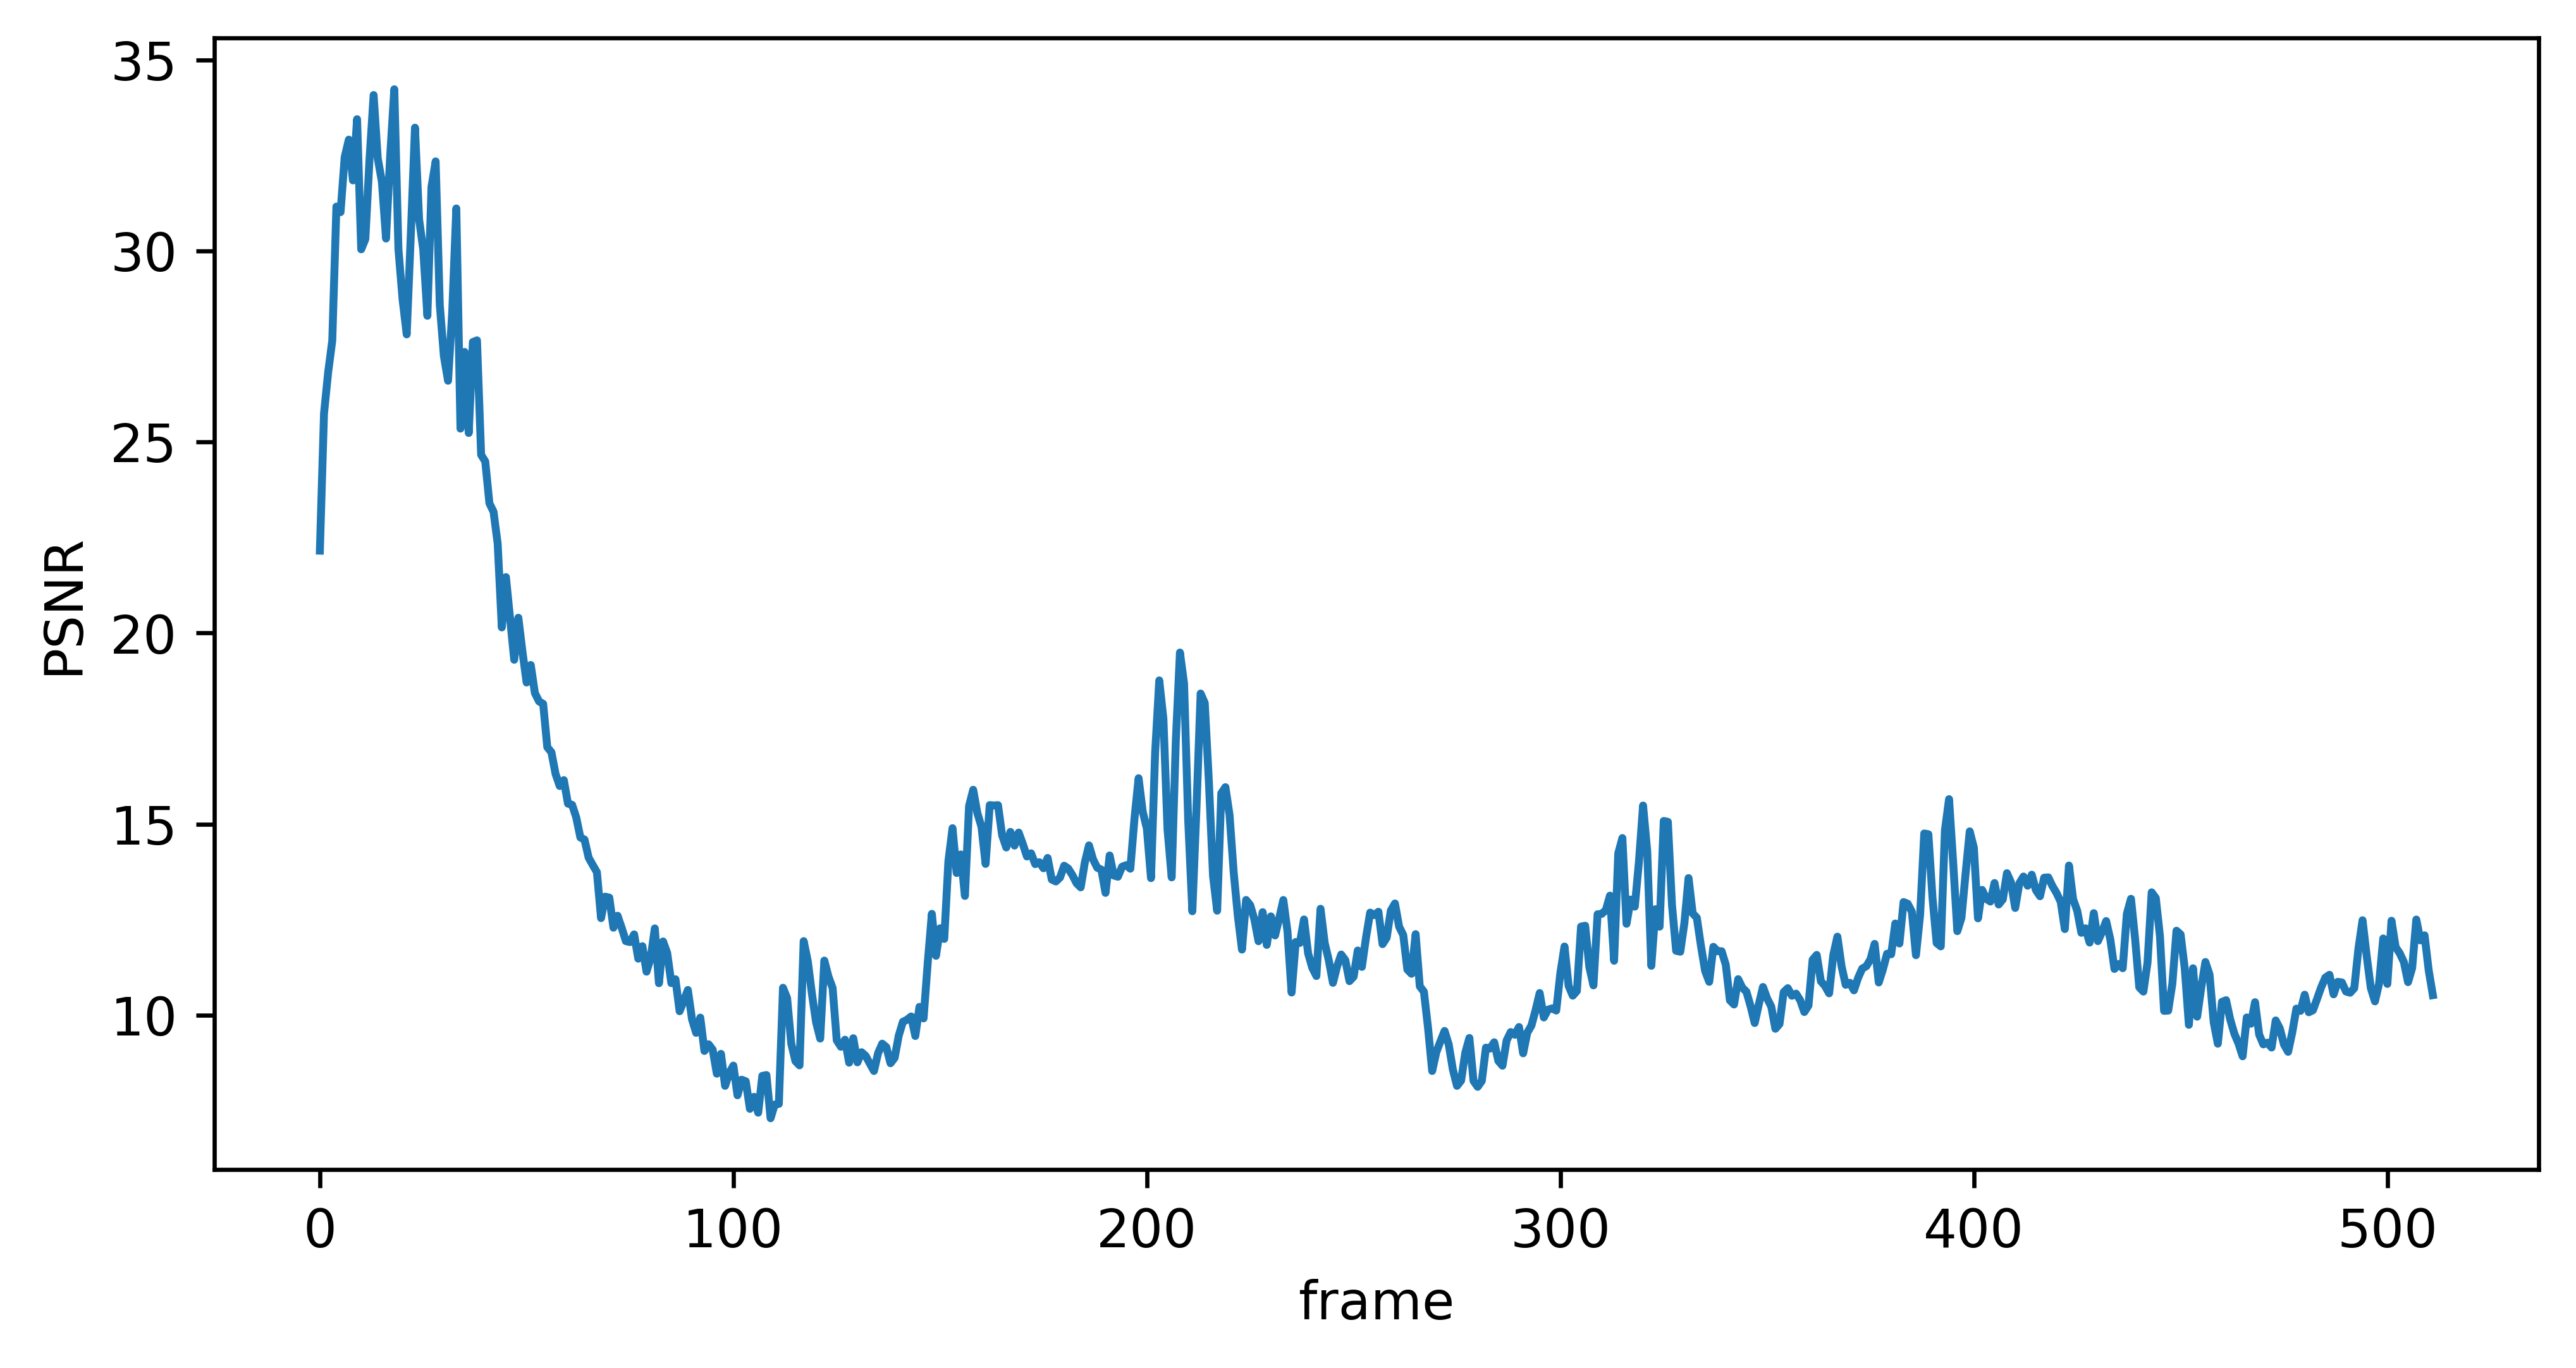

In [10]:
os.chdir('/home/aijjeh/Desktop/Phd_Projects/compressive_sensing_project/Experimental/Uniform_mesh_2nd_model/Compression_ration_0.215/')
plt.figure(figsize=(20/2.53,10/2.53), dpi=600)
plt.plot(PSNR)
plt.xlabel('frame')
plt.ylabel('PSNR')
# plt.savefig("PSNR_for_512_frames_exp_delamination_region.png")
plt.show()